In [53]:
# Imports
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [203]:
def load_raw_data(txt_filename: str) -> pd.DataFrame:
    """ Loads the .txt data from the Data folder as pandas DataFrame 
        :argument: txt_filename - name of the text file with .txt extension
        :return: dataframe - pandas DataFrame
    """
    # Define the data folder path
    data_path = Path().absolute().parent.joinpath('data', 'raw')
    # Open with pandas without header and space as separator
    dataframe = pd.read_csv(data_path.joinpath(txt_filename), sep=' ', header=None).dropna(axis=1, how='all')
    # Define number of sensor columns
    sensors_number = len(dataframe.columns) - 5
    # Rename the columns to corrensponding value
    column_names = ['unit', 'cycle', 'altitude', 'mach', 'tra'] + [f'sensor_{i}' for i in range(1, sensors_number + 1)]
    dataframe.columns = column_names
    return dataframe

def create_target(raw_data: pd.DataFrame) -> pd.DataFrame:
    """ Creates the RUL target variable based on max cycles from the dataset 
        :argument: raw_data - Pandas DataFrame containing training data
        :return: dataset - Pandas DataFrame containing training data and target variable
    """
    data = raw_data.copy()
    # Group the data by unit column and calculate the max cycle
    grouped = data.groupby('unit')
    max_cycle = grouped['cycle'].max()
    # Merge the max cycle back to the data
    data = data.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit', right_index=True)
    # Calculate difference between max cycle and current cycle, create RUL
    data['rul'] = data['max_cycle'] - data['cycle']
    # Drop the max cycle column
    data.drop('max_cycle', axis=1, inplace=True)
    return data

def round_conditions(data: pd.DataFrame) -> pd.DataFrame:
    """ Rounds the values of condition columns (altitude, mach, tra) """
    data['altitude'] = data['altitude'].round()
    data['mach'] = data['mach'].round(2)
    data['tra'] = data['tra'].round()
    return data

def plot_histogram(data: pd.DataFrame, column: str, unit: str = None) -> None:
    """ Plots the histogram for specified column grouped by unit """
    if column == 'rul':
        data = data[['unit', column]].groupby('unit').max().reset_index()
        unit = None
    if unit:
        data = data[data['unit'] == unit]
    data[column].hist(bins=15, figsize=(10,6))
    plt.xlabel(column)
    plt.show()
    
def plot_sensors(input_data: pd.DataFrame, sensor_names: list, unit: str = None) -> None:
    """ Plots the sensor values for given sensor name over the RUL """
    data = input_data.copy()
    if len(sensor_names) != 4:
        return "Specify 4 sensor names"
    fig, axs = plt.subplots(2, 2, figsize=(20,10))
    if unit:
        data = data[data['unit'] == unit]
    else:
        max_unit = data['unit'].max()
        random_units = np.random.randint(1, max_unit, size=5)
        print('Random units: ', random_units)
    for i in range(2):
        for j in range(2):
            k = 0
            if i == 1:
                k = 1 
            sensor_name = sensor_names[j+i+k]
            if unit is None:
                for unit_number in random_units.tolist():
                    axs[i,j].plot('rul', sensor_name, data=data[data['unit'] == unit_number])
            else:
                axs[i,j].plot('rul', sensor_name, data=data)
            axs[i,j].set_xlim(300, 0) 
            axs[i,j].set_ylabel(sensor_name)
            axs[i,j].set_xlabel('RUL')
            axs[i,j].set_title(sensor_name)
            axs[i,j].grid(True)
    plt.show()

In [204]:
raw_data = load_raw_data('train_FD003.txt')
data = create_target(raw_data)
data = round_conditions(data)

In [205]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
unit,24720.0,48.631877,2.934899e+01,1.0000,23.0000,47.0000,74.0000,100.0000
cycle,24720.0,139.077063,9.884668e+01,1.0000,62.0000,124.0000,191.0000,525.0000
altitude,24720.0,0.000000,0.000000e+00,-0.0000,0.0000,0.0000,0.0000,-0.0000
mach,24720.0,0.000000,0.000000e+00,0.0000,0.0000,0.0000,0.0000,0.0000
tra,24720.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
sensor_1,24720.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
sensor_2,24720.0,642.457858,5.230311e-01,640.8400,642.0800,642.4000,642.7900,645.1100
sensor_3,24720.0,1588.079175,6.810418e+00,1564.3000,1583.2800,1587.5200,1592.4125,1615.3900
sensor_4,24720.0,1404.471212,9.773178e+00,1377.0600,1397.1875,1402.9100,1410.6000,1441.1600
sensor_5,24720.0,14.620000,3.552786e-15,14.6200,14.6200,14.6200,14.6200,14.6200


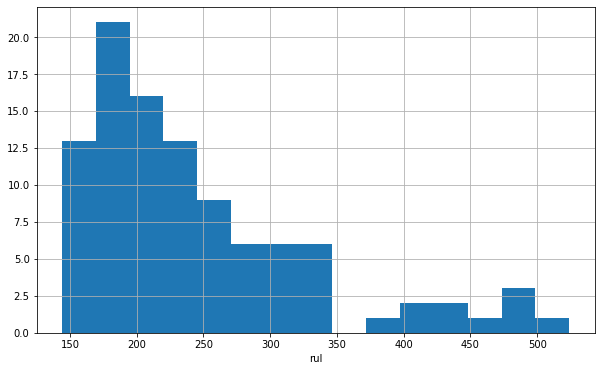

In [201]:
plot_histogram(data, 'rul')

Random units:  [16 80 59 40 89]


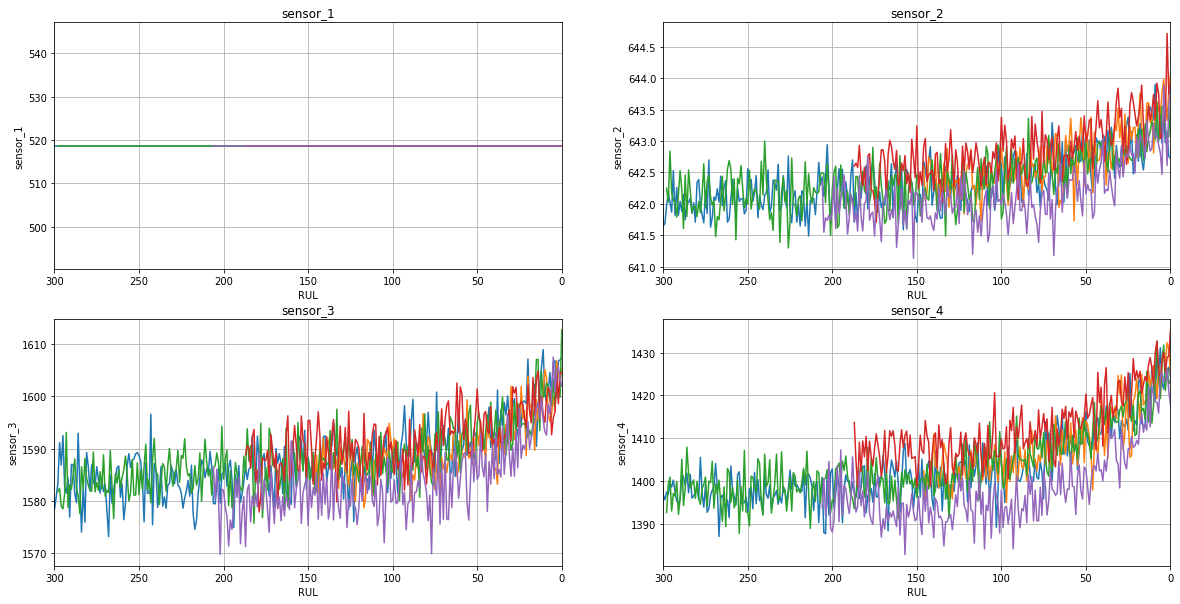

In [198]:
sensors = ['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4']
plot_sensors(data, sensors)

Random units:  [28 65 44 64 64]


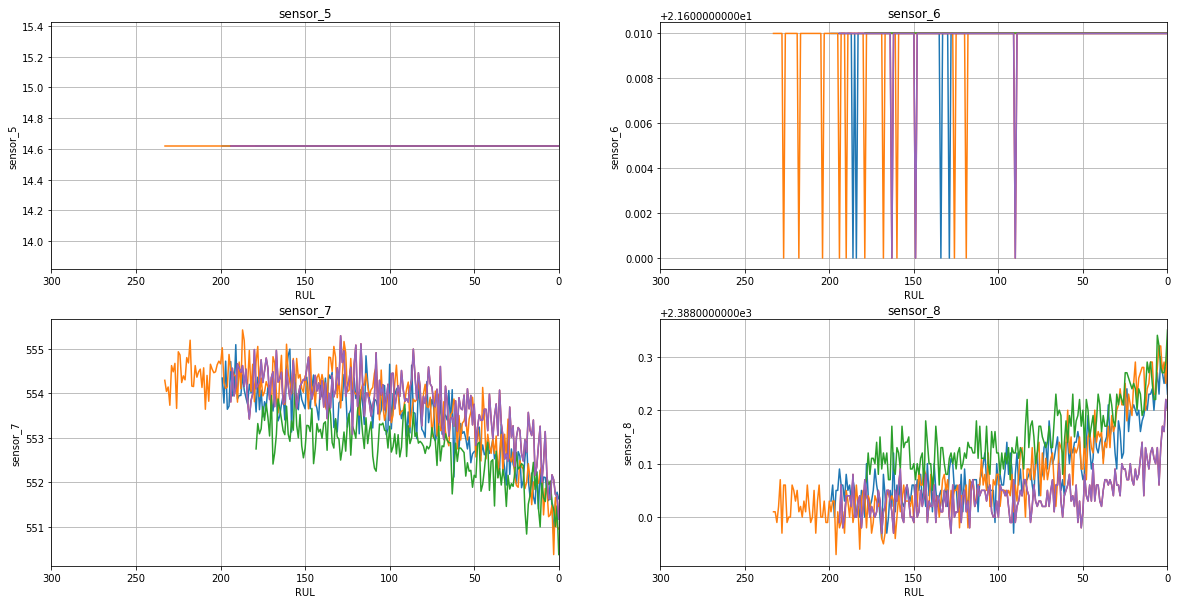

In [199]:
sensors = ['sensor_5', 'sensor_6', 'sensor_7', 'sensor_8']
plot_sensors(data, sensors)

Random units:  [87 99 73 25 64]


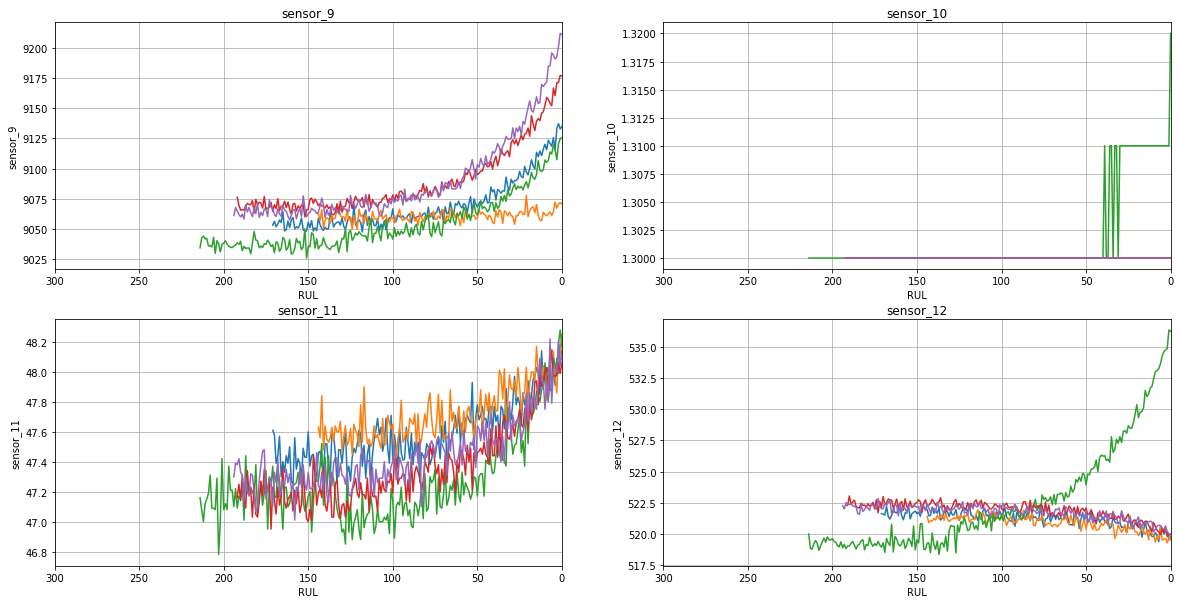

In [200]:
sensors = ['sensor_9', 'sensor_10', 'sensor_11', 'sensor_12']
plot_sensors(data, sensors)